In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('owid-energy-data.csv')

In [3]:
df.shape

(21813, 130)

In [4]:
df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


In [5]:
pd.options.display.max_columns = 140

In [6]:
df.iloc[:,:70].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21813 entries, 0 to 21812
Data columns (total 70 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        21813 non-null  object 
 1   year                           21813 non-null  int64  
 2   iso_code                       16813 non-null  object 
 3   population                     18448 non-null  float64
 4   gdp                            11775 non-null  float64
 5   biofuel_cons_change_pct        1806 non-null   float64
 6   biofuel_cons_change_twh        2796 non-null   float64
 7   biofuel_cons_per_capita        2400 non-null   float64
 8   biofuel_consumption            2876 non-null   float64
 9   biofuel_elec_per_capita        5570 non-null   float64
 10  biofuel_electricity            5834 non-null   float64
 11  biofuel_share_elec             5811 non-null   float64
 12  biofuel_share_energy           2778 non-null  

In [7]:
df.iloc[:,-60:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21813 entries, 0 to 21812
Data columns (total 60 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   low_carbon_share_energy                       4903 non-null   float64
 1   net_elec_imports                              5575 non-null   float64
 2   net_elec_imports_share_demand                 5547 non-null   float64
 3   nuclear_cons_change_pct                       2482 non-null   float64
 4   nuclear_cons_change_twh                       6837 non-null   float64
 5   nuclear_consumption                           6976 non-null   float64
 6   nuclear_elec_per_capita                       8758 non-null   float64
 7   nuclear_electricity                           9683 non-null   float64
 8   nuclear_energy_per_capita                     6315 non-null   float64
 9   nuclear_share_elec                            7204 non-null  

In [8]:
df.iloc[:,:70].isnull().sum().sort_values(ascending=False).head(50)

biofuel_cons_change_pct          20007
biofuel_cons_per_capita          19413
biofuel_share_energy             19035
biofuel_cons_change_twh          19017
biofuel_consumption              18937
electricity_share_energy         17851
fossil_energy_per_capita         17513
gas_energy_per_capita            17258
coal_cons_per_capita             17059
low_carbon_energy_per_capita     16981
hydro_energy_per_capita          16981
hydro_share_energy               16910
gas_share_energy                 16910
coal_share_energy                16910
fossil_share_energy              16910
fossil_cons_change_twh           16858
fossil_cons_change_pct           16858
fossil_fuel_consumption          16753
hydro_cons_change_pct            16673
gas_cons_change_pct              16663
gas_cons_change_twh              16602
low_carbon_cons_change_pct       16596
coal_cons_change_pct             16515
gas_consumption                  16498
coal_cons_change_twh             16397
low_carbon_cons_change_tw

In [9]:
df['primary_energy_consumption']

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
          ...  
21808    46.120
21809    41.997
21810    42.145
21811       NaN
21812       NaN
Name: primary_energy_consumption, Length: 21813, dtype: float64

In [10]:
cols_to_drop = [
    # Identifiers & Metadata (Not useful for prediction)
    "country",
    "iso_code",
    "year",
    
    # Weakly Related or Indirect Features
    "biofuel_share_energy",
    "coal_share_energy",
    "electricity_share_energy",
    "fossil_share_energy",
    "gas_share_energy",
    "hydro_share_energy",
    "low_carbon_share_energy",
    "nuclear_share_energy",
    "oil_share_energy",
    "other_renewables_share_energy",
    "renewables_share_energy",
    "solar_share_energy",
    "wind_share_energy",
    
    # Change Percentage Columns (Derivable from absolute values)
    "biofuel_cons_change_pct",
    "coal_cons_change_pct",
    "energy_cons_change_pct",
    "fossil_cons_change_pct",
    "gas_cons_change_pct",
    "hydro_cons_change_pct",
    "low_carbon_cons_change_pct",
    "nuclear_cons_change_pct",
    "oil_cons_change_pct",
    "other_renewables_cons_change_pct",
    "renewables_cons_change_pct",
    "solar_cons_change_pct",
    "wind_cons_change_pct",
    
    # Per Capita & GDP-Based Columns (We focus on total energy)
    "biofuel_cons_per_capita",
    "coal_cons_per_capita",
    "electricity_demand_per_capita",
    "energy_per_capita",
    "energy_per_gdp",
    "fossil_elec_per_capita",
    "fossil_energy_per_capita",
    "gas_elec_per_capita",
    "gas_energy_per_capita",
    "hydro_elec_per_capita",
    "hydro_energy_per_capita",
    "low_carbon_elec_per_capita",
    "low_carbon_energy_per_capita",
    "nuclear_elec_per_capita",
    "nuclear_energy_per_capita",
    "oil_elec_per_capita",
    "oil_energy_per_capita",
    "other_renewables_elec_per_capita",
    "other_renewables_energy_per_capita",
    "per_capita_electricity",
    "renewables_elec_per_capita",
    "renewables_energy_per_capita",
    "solar_elec_per_capita",
    "solar_energy_per_capita",
    "wind_elec_per_capita",
    "wind_energy_per_capita",
    
    # Electricity Share-Based Columns (Use absolute values instead)
    "biofuel_share_elec",
    "coal_share_elec",
    "fossil_share_elec",
    "gas_share_elec",
    "hydro_share_elec",
    "low_carbon_share_elec",
    "nuclear_share_elec",
    "oil_share_elec",
    "other_renewables_share_elec",
    "renewables_share_elec",
    "solar_share_elec",
    "wind_share_elec",
    
    # Electricity Imports (Not directly related to consumption prediction)
    "net_elec_imports",
    "net_elec_imports_share_demand",
    
    # Greenhouse Gas Emissions (Useful for climate studies, but not directly for energy prediction)
    "greenhouse_gas_emissions"
]

In [11]:
df.drop(columns=cols_to_drop,inplace=True)

In [12]:
df.shape

(21813, 60)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21813 entries, 0 to 21812
Data columns (total 60 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   population                                    18448 non-null  float64
 1   gdp                                           11775 non-null  float64
 2   biofuel_cons_change_twh                       2796 non-null   float64
 3   biofuel_consumption                           2876 non-null   float64
 4   biofuel_elec_per_capita                       5570 non-null   float64
 5   biofuel_electricity                           5834 non-null   float64
 6   carbon_intensity_elec                         5835 non-null   float64
 7   coal_cons_change_twh                          5416 non-null   float64
 8   coal_consumption                              5521 non-null   float64
 9   coal_elec_per_capita                          6095 non-null  

In [14]:
df.isnull().sum().sort_values(ascending=False)

biofuel_cons_change_twh                         19017
biofuel_consumption                             18937
solar_cons_change_twh                           17133
wind_cons_change_twh                            17071
solar_consumption                               17027
wind_consumption                                16966
fossil_cons_change_twh                          16858
other_renewables_cons_change_twh                16837
other_renewables_elec_per_capita_exc_biofuel    16807
fossil_fuel_consumption                         16753
other_renewable_consumption                     16732
gas_cons_change_twh                             16602
other_renewables_share_elec_exc_biofuel         16566
other_renewable_exc_biofuel_electricity         16543
gas_consumption                                 16498
coal_cons_change_twh                            16397
hydro_cons_change_twh                           16319
renewables_cons_change_twh                      16319
low_carbon_cons_change_twh  

In [15]:
cols_to_drop.clear()

In [16]:
cols_to_drop.extend([
    "biofuel_cons_change_twh",
    "biofuel_consumption",
    "solar_cons_change_twh",
    "wind_cons_change_twh",
    "solar_consumption",
    "wind_consumption",
    "fossil_cons_change_twh",
    "other_renewables_cons_change_twh",
    "other_renewables_elec_per_capita_exc_biofuel",
    "fossil_fuel_consumption",
    "other_renewable_consumption",
    "gas_cons_change_twh",
    "other_renewables_share_elec_exc_biofuel",
    "other_renewable_exc_biofuel_electricity",
    "gas_consumption",
    "coal_cons_change_twh",
    "hydro_cons_change_twh",
    "renewables_cons_change_twh",
    "low_carbon_cons_change_twh",
    "coal_consumption",
    "biofuel_elec_per_capita",
    "low_carbon_consumption",
    "renewables_consumption",
    "hydro_consumption",
    "oil_cons_change_twh",
    "oil_consumption",
    "biofuel_electricity",
    "carbon_intensity_elec",
    "electricity_demand"
])

In [17]:
df.drop(cols_to_drop,axis=1,inplace=True)

In [18]:
df.isnull().sum().sort_values(ascending=False)

coal_elec_per_capita           15718
gas_electricity                15199
oil_electricity                15164
coal_electricity               15103
fossil_electricity             15084
nuclear_cons_change_twh        14976
nuclear_consumption            14837
electricity_generation         14401
gas_prod_change_pct            14038
low_carbon_electricity         13815
renewables_electricity         13703
solar_electricity              13610
wind_electricity               13578
other_renewable_electricity    13386
hydro_electricity              12752
coal_prod_change_pct           12156
nuclear_electricity            12130
oil_prod_change_pct            12019
gdp                            10038
energy_cons_change_twh          9898
primary_energy_consumption      9633
coal_prod_per_capita            7050
gas_prod_per_capita             6856
oil_prod_per_capita             6378
coal_prod_change_twh            5520
coal_production                 5265
gas_prod_change_twh             5227
g

In [19]:
df['pec_copy'] = df['primary_energy_consumption'].ffill()

In [20]:
df[['population', 'gdp']] = df[['population', 'gdp']].ffill()

In [21]:
trend_cols = [
    'nuclear_consumption', 'oil_production', 'energy_cons_change_twh'
]
df[trend_cols] = df[trend_cols].interpolate(method='linear')

In [22]:
change_cols = [
    'coal_prod_change_twh', 'gas_prod_change_twh', 'oil_prod_change_twh',
    'coal_prod_change_pct', 'gas_prod_change_pct', 'oil_prod_change_pct',
    'energy_cons_change_twh'
]
df[change_cols] = df[change_cols].ffill()

In [23]:
elec_cols = [
    'electricity_generation', 'solar_electricity', 'wind_electricity', 'hydro_electricity',
    'coal_electricity', 'oil_electricity', 'gas_electricity', 'nuclear_electricity',
    'fossil_electricity', 'low_carbon_electricity', 'renewables_electricity'
]
df[elec_cols] = df[elec_cols].ffill().interpolate(method='linear')

In [24]:
df.isnull().sum().sort_values(ascending=False)

coal_elec_per_capita           15718
nuclear_cons_change_twh        14976
other_renewable_electricity    13386
primary_energy_consumption      9633
coal_prod_per_capita            7050
gas_prod_per_capita             6856
oil_prod_per_capita             6378
coal_production                 5265
gas_production                  4972
nuclear_consumption              212
oil_prod_change_pct              159
oil_prod_change_twh              105
energy_cons_change_twh           105
pec_copy                         104
oil_production                   104
gas_prod_change_pct               92
gdp                               74
coal_prod_change_pct              74
gas_prod_change_twh               25
coal_prod_change_twh              25
population                        24
oil_electricity                    0
nuclear_electricity                0
low_carbon_electricity             0
gas_electricity                    0
fossil_electricity                 0
electricity_generation             0
c

In [25]:
cols_to_drop.clear()

In [26]:
cols_to_drop.extend(['coal_elec_per_capita','nuclear_cons_change_twh','other_renewable_electricity'])

In [27]:
df.drop(columns=cols_to_drop,inplace=True)

In [28]:
df.isnull().sum().sort_values(ascending=False)

primary_energy_consumption    9633
coal_prod_per_capita          7050
gas_prod_per_capita           6856
oil_prod_per_capita           6378
coal_production               5265
gas_production                4972
nuclear_consumption            212
oil_prod_change_pct            159
oil_prod_change_twh            105
energy_cons_change_twh         105
oil_production                 104
pec_copy                       104
gas_prod_change_pct             92
gdp                             74
coal_prod_change_pct            74
gas_prod_change_twh             25
coal_prod_change_twh            25
population                      24
nuclear_electricity              0
oil_electricity                  0
gas_electricity                  0
electricity_generation           0
low_carbon_electricity           0
hydro_electricity                0
coal_electricity                 0
renewables_electricity           0
solar_electricity                0
wind_electricity                 0
fossil_electricity  

<Axes: ylabel='pec_copy'>

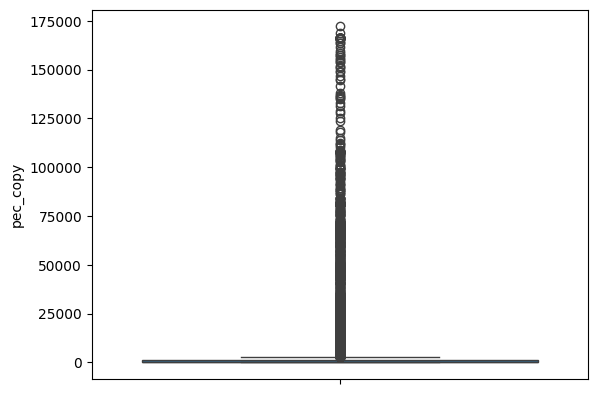

In [29]:
sns.boxplot(y=df['pec_copy'])

In [30]:
df['primary_energy_consumption'].mode()

0    0.0
Name: primary_energy_consumption, dtype: float64

In [31]:
from sklearn.linear_model import LinearRegression
import pandas as pd

temp_df = df

features = ['wind_electricity','solar_electricity','renewables_electricity','oil_prod_change_twh','oil_production','oil_electricity','nuclear_consumption',
           'nuclear_electricity','gas_production','hydro_electricity','low_carbon_electricity','gas_prod_change_twh','gas_electricity','fossil_electricity',
           'energy_cons_change_twh','electricity_generation','coal_production','coal_prod_change_twh','coal_electricity','gdp','population']  # Choose relevant columns

train = temp_df[temp_df["primary_energy_consumption"].notnull()].dropna(subset=features)
test = temp_df[temp_df["primary_energy_consumption"].isnull()]

test = test.dropna(subset=features)

model = LinearRegression()
model.fit(train[features], train["primary_energy_consumption"])

LinearRegression()

In [32]:
missing_indices = temp_df[temp_df["primary_energy_consumption"].isnull()].index

test = test.dropna(subset=features)

predictions = model.predict(test[features])

temp_df.loc[missing_indices[:len(predictions)], "primary_energy_consumption"] = predictions

temp_df["primary_energy_consumption"].fillna(temp_df["primary_energy_consumption"].median(), inplace=True)

In [33]:
temp_df['primary_energy_consumption'].isnull().sum()

0

In [34]:
df["primary_energy_consumption"] = temp_df["primary_energy_consumption"]

<Axes: >

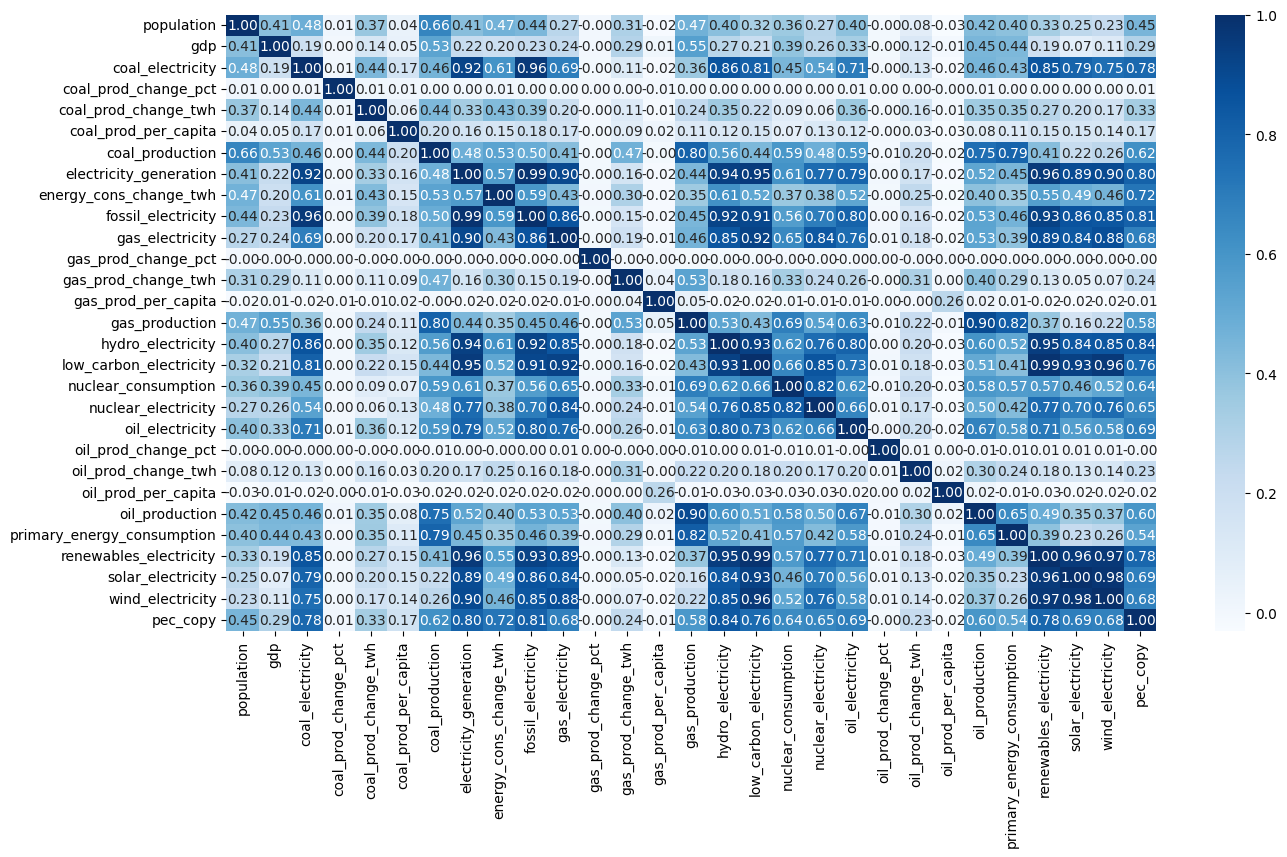

In [35]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='Blues')

In [36]:
df.isnull().sum().sort_values(ascending=False)

coal_prod_per_capita          7050
gas_prod_per_capita           6856
oil_prod_per_capita           6378
coal_production               5265
gas_production                4972
nuclear_consumption            212
oil_prod_change_pct            159
oil_prod_change_twh            105
energy_cons_change_twh         105
oil_production                 104
pec_copy                       104
gas_prod_change_pct             92
coal_prod_change_pct            74
gdp                             74
gas_prod_change_twh             25
coal_prod_change_twh            25
population                      24
fossil_electricity               0
nuclear_electricity              0
oil_electricity                  0
low_carbon_electricity           0
hydro_electricity                0
gas_electricity                  0
coal_electricity                 0
primary_energy_consumption       0
renewables_electricity           0
solar_electricity                0
wind_electricity                 0
electricity_generati

<Axes: >

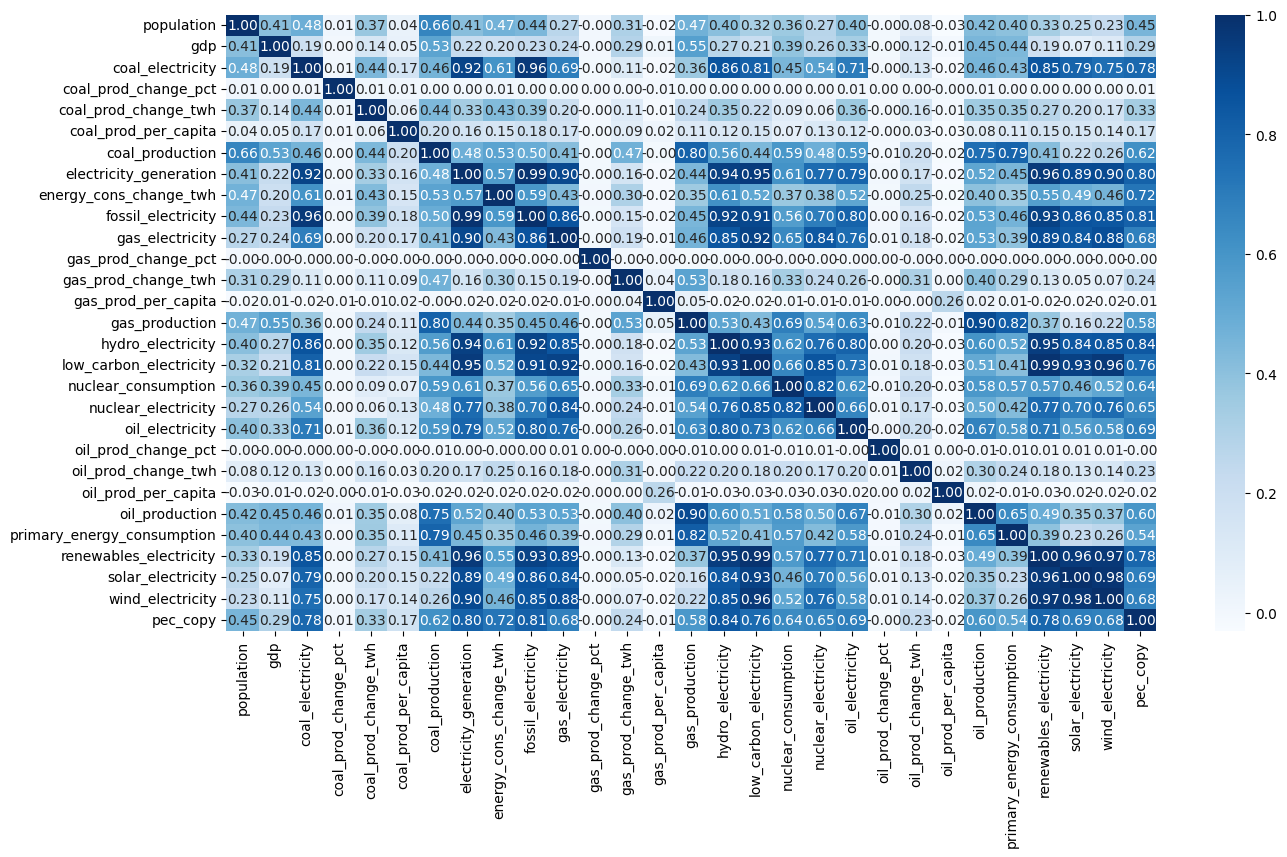

In [37]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='Blues')

In [38]:
cols_to_drop.clear()

In [39]:
cols_to_drop.extend(['fossil_electricity','hydro_electricity','low_carbon_electricity','renewables_electricity'])

In [40]:
df.drop(columns=cols_to_drop,inplace=True)

<Axes: >

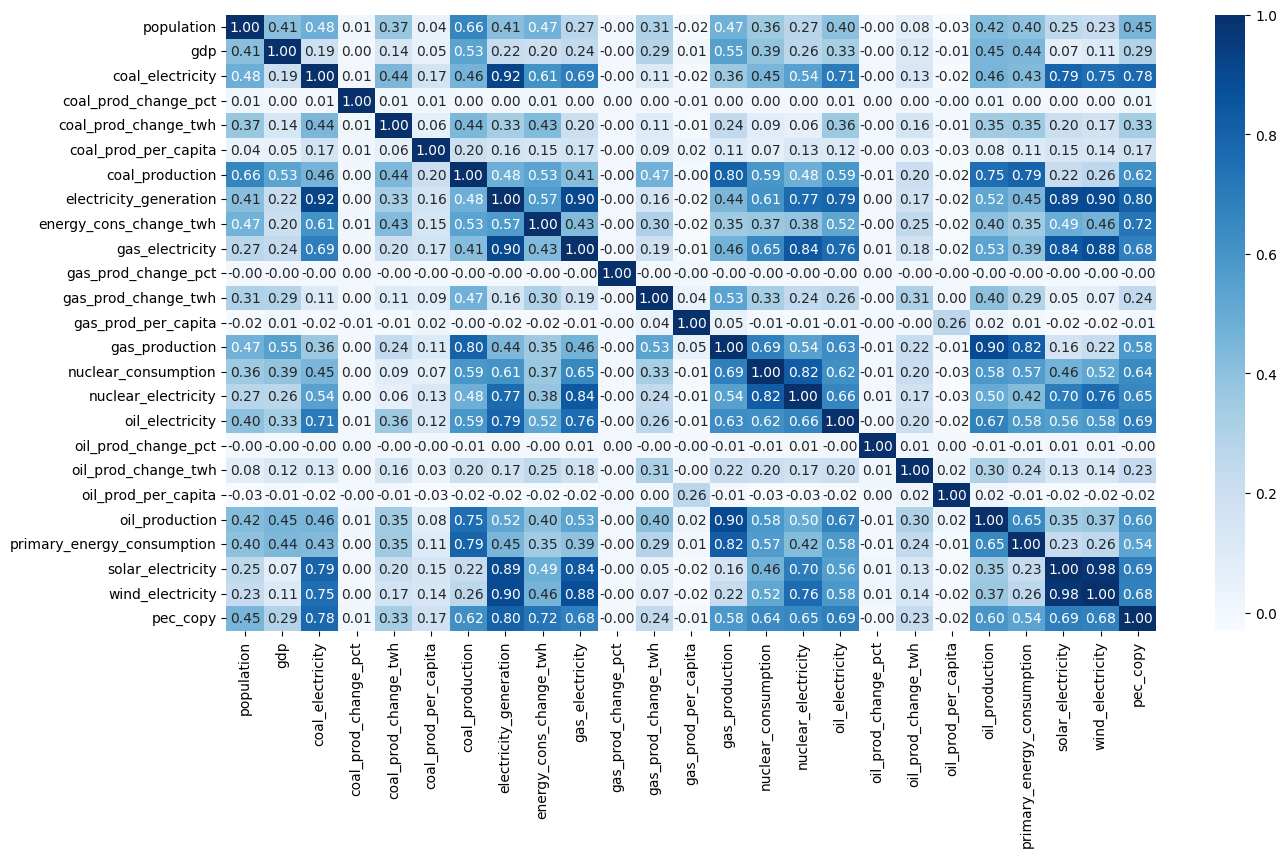

In [41]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='Blues')

In [42]:
cols_to_drop.clear()

In [43]:
df.isnull().sum().sort_values(ascending=False)

coal_prod_per_capita          7050
gas_prod_per_capita           6856
oil_prod_per_capita           6378
coal_production               5265
gas_production                4972
nuclear_consumption            212
oil_prod_change_pct            159
oil_prod_change_twh            105
energy_cons_change_twh         105
oil_production                 104
pec_copy                       104
gas_prod_change_pct             92
gdp                             74
coal_prod_change_pct            74
gas_prod_change_twh             25
coal_prod_change_twh            25
population                      24
gas_electricity                  0
nuclear_electricity              0
oil_electricity                  0
electricity_generation           0
coal_electricity                 0
primary_energy_consumption       0
solar_electricity                0
wind_electricity                 0
dtype: int64

In [44]:
df.describe()

,population,gdp,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,electricity_generation,energy_cons_change_twh,gas_electricity,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,nuclear_consumption,nuclear_electricity,oil_electricity,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,primary_energy_consumption,solar_electricity,wind_electricity,pec_copy
count,2.178900e+04,2.173900e+04,21813.000000,21739.000000,21788.000000,14763.000000,16548.000000,21813.000000,21708.000000,21813.000000,2.172100e+04,21788.000000,14957.000000,16841.000000,21601.000000,21813.000000,21813.000000,21654.000000,21708.000000,1.543500e+04,21709.000000,21813.000000,21813.000000,21813.000000,21709.000000
mean,1.752265e+08,7.681032e+11,424.658199,-8.766343,23.896466,3463.255628,984.531283,1217.402838,129.030363,278.222144,4.292259e+13,13.610410,6541.728007,624.198809,219.828877,125.632986,36.771221,9.712470,24.159712,2.545371e+04,1251.834649,3365.033522,54.777524,82.399432,6037.650024
std,6.689643e+08,4.011525e+12,1523.310468,418.423323,253.034916,9620.660291,3541.538677,3537.608851,547.429075,772.686201,6.325952e+15,96.947362,37139.273154,2407.830425,698.001509,383.020162,110.690315,302.093037,204.082417,1.631518e+05,4165.193167,12096.624139,185.729477,264.993406,18825.956751
min,1.833000e+03,1.642060e+08,0.000000,-100.000000,-2380.352000,0.000000,0.000000,0.000000,-6069.188000,0.000000,-1.000000e+02,-1147.562000,0.000000,0.000000,0.000000,0.000000,0.000000,-100.000000,-3479.969000,0.000000e+00,0.000000,-2015.233492,0.000000,0.000000,0.000000
25%,1.739834e+06,2.108787e+10,0.000000,-18.206000,0.000000,0.000000,0.000000,2.630000,0.000000,0.000000,-6.667000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.130000,-4.430000,0.000000,0.000000e+00,0.000000,10.311000,0.000000,0.000000,13.407000
50%,7.109036e+06,7.594852e+10,0.050000,-1.491000,0.000000,29.634000,1.351000,20.880000,2.437203,2.200000,-3.870000e-01,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,0.274000,0.000000,6.093000e+00,1.284182,102.053000,0.040000,0.010000,109.900000
75%,3.211912e+07,3.200270e+11,30.630000,4.595000,0.384250,2064.000000,114.864750,187.793000,24.525134,51.300000,5.590000e+00,0.493250,762.290000,57.509000,43.862372,8.160000,10.520000,6.551000,1.210000,2.480314e+03,169.516333,680.163000,1.917000,2.634000,1145.465000
max,8.045311e+09,1.301126e+14,10467.930000,44965.750000,3162.273000,151662.266000,49789.156000,29479.051000,8906.781000,6622.930000,9.323217e+17,2093.012000,852961.562000,40592.312000,7653.722000,2762.240000,1366.023000,26472.602000,2795.154000,3.493139e+06,52432.227000,172119.062000,1629.900000,2304.440000,172119.062000


In [45]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [46]:
df_imputed.to_csv('cleaned_quantum.csv')